## Credit EDA Case Study

### Introduction

In this case study, we will apply the techniques of **Exploratory Data Analysis** and also develop a basic understanding of **risk analytics** in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### Importing the necessary python libraries to perform EDA

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Understanding Data

There are 2 datasets explained below: 

1. **'application_data.csv'**  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

2. **'previous_application.csv'** contains information about the client’s previous loan data. 
It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [89]:
app = pd.read_csv(r'C:\Users\Vishu\Documents\Python Workspace\DATASETS\Credit Case Study\application_data.csv')
pre = pd.read_csv(r'C:\Users\Vishu\Documents\Python Workspace\DATASETS\Credit Case Study\previous_application.csv')

In [90]:
# Have a look on first 5 rows of application data using head()
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# Have a look on first 5 rows of previous application data using head()
pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Let us build data understanding of application data first

In [92]:
# shape specifies no. of rows and columns in the dataset
app.shape

(307511, 122)

In [93]:
# info() function is used to print a concise summary of a DataFrame
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Handling Missing Values

The below function **missing_values()** is created to find the no. of NULL values as well as calculate the percentage of NULL values present in each column.

In [94]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total Nulls', 'Percent Nulls'])


In [95]:
# Missing values present in application data
missing_values(app).head(10)

,Total Nulls,Percent Nulls
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


##### Turning point of analysis

The application data contains all the information about the client which is important to be stored in company's database but from the analysis point of view, there are many columns which are irrelevant. The main focus here, is on that particular columns which will help in **analysing the driver variables** which directly affect the 'Target' variable.

For eg. columns like apartments area, no. of enquiries etc may be client's important data but has no effect in determining defaulter or not.

So, the best approach will be to create a seperate dataframe with selected columns that need to be focused.

In [96]:
# Occupation type is necessary to analyse
# Fixing null value of occupation before dropping the irrelevant columns otherwise it may get removed too.
app.OCCUPATION_TYPE.fillna(value='Not Mentioned',inplace=True)

How to select particular columns?

A seperate dataframe is created using :
1. Columns with more than 13% of null values are removed.
2. Later irrelvant columns are removed which don't affect anything.

In [97]:
# columns with more than 13% of null values 
null_cols = app.columns[(app.isnull().sum()/(app.isnull().count())*100) > 13]
null_cols

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVIN

In [98]:
# Dropping the irrelevant columns and assigning the result to new dataframe. 
app_data = app.drop(null_cols,axis=1)


In [99]:
# Irrelvant columns are removed which don't affect anything from the left over columns.
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE

In [100]:
# Selecting particular columns which affect the Target variable and can be considered in driver variable category.
# The new application data is set up to analyse.
app_data = app_data[['SK_ID_CURR', 'TARGET','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE', 'OCCUPATION_TYPE', 
                     'NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED']]
app_data

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED
0,100002,1,Y,202500.0,351000.0,Laborers,Working,Single / not married,House / apartment,-9461,-637
1,100003,0,N,270000.0,1129500.0,Core staff,State servant,Married,House / apartment,-16765,-1188
2,100004,0,Y,67500.0,135000.0,Laborers,Working,Single / not married,House / apartment,-19046,-225
3,100006,0,Y,135000.0,297000.0,Laborers,Working,Civil marriage,House / apartment,-19005,-3039
4,100007,0,Y,121500.0,513000.0,Core staff,Working,Single / not married,House / apartment,-19932,-3038
...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,N,157500.0,225000.0,Sales staff,Working,Separated,With parents,-9327,-236
307507,456252,0,Y,72000.0,225000.0,Not Mentioned,Pensioner,Widow,House / apartment,-20775,365243
307508,456253,0,Y,153000.0,585000.0,Managers,Working,Separated,House / apartment,-14966,-7921
307509,456254,1,Y,171000.0,319500.0,Laborers,Commercial associate,Married,House / apartment,-11961,-4786


### Let us build data understanding of Previous Application Data

Using the same technique, the previous application data is also compressed to the columns which can be considered as driver variables

In [101]:
# info() function is used to print a concise summary of a DataFrame
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [102]:
# Dropping the irrelevant columns and assigning the result to new dataframe.
prev_data = pre.drop(pre.columns[(pre.isnull().sum()/(pre.isnull().count())*100) > 25],axis=1)
prev_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [103]:
# Selecting particular columns which affect the Target variable.
# The new previous application data is set up to analyse.
prev_data = prev_data[['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE',
       'AMT_APPLICATION', 'NAME_CONTRACT_STATUS','CODE_REJECT_REASON']]

### Data Cleaning and Manipulation

#### Handling Missing values for new dataframes

In [104]:
# Have a look on null values in applicaton data.
missing_values(app_data)

,Total Nulls,Percent Nulls
AMT_GOODS_PRICE,278,0.090403
DAYS_EMPLOYED,0,0.000000
DAYS_BIRTH,0,0.000000
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_INCOME_TYPE,0,0.000000
OCCUPATION_TYPE,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
FLAG_OWN_REALTY,0,0.000000
TARGET,0,0.000000


#### Replacing Null values

In [105]:
print('Mean   : ',app_data.AMT_GOODS_PRICE.mean())
print('Median : ',app_data.AMT_GOODS_PRICE.median())

Mean   :  538396.2074288895
Median :  450000.0


Since there is huge differnece in mean and median, so that means, that there are outliers. So a good approach will be replacing the missing values with median for numerical columns.

In [106]:
# replacing with median
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(),inplace=True)


In [107]:
# We can see, there are no null values now
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SK_ID_CURR          307511 non-null  int64  
 1   TARGET              307511 non-null  int64  
 2   FLAG_OWN_REALTY     307511 non-null  object 
 3   AMT_INCOME_TOTAL    307511 non-null  float64
 4   AMT_GOODS_PRICE     307511 non-null  float64
 5   OCCUPATION_TYPE     307511 non-null  object 
 6   NAME_INCOME_TYPE    307511 non-null  object 
 7   NAME_FAMILY_STATUS  307511 non-null  object 
 8   NAME_HOUSING_TYPE   307511 non-null  object 
 9   DAYS_BIRTH          307511 non-null  int64  
 10  DAYS_EMPLOYED       307511 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 25.8+ MB


#### Converting to proper datatypes

Since DAYS_BIRTH & DAYS_EMPLOYED have negative values as these are the past days, so converting them to absolute values.

Also dividing them with 365 gives the data in years which is easy to understand. 

In [108]:
app_data.DAYS_BIRTH = app_data.DAYS_BIRTH.abs()//365
app_data.DAYS_EMPLOYED = app_data.DAYS_EMPLOYED.abs()//365


### Handling Outliers 

An outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.


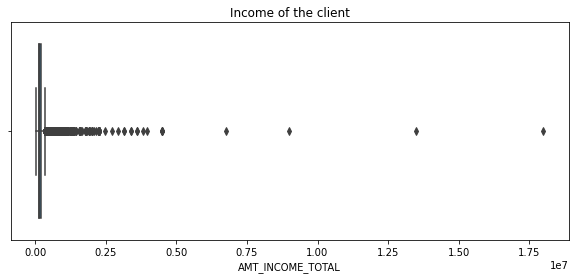

Mean   :  168417.99278376313
Median :  147150.0


-- Client with extra-ordinary Income
12840    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


In [109]:
# Here 'Income of the client' has some outliers.
plt.figure(figsize=[10,4])
sns.boxplot(app_data.AMT_INCOME_TOTAL[~(app_data.AMT_INCOME_TOTAL > 10**8)])
plt.title('Income of the client')
plt.show()
print('Mean   : ',app_data.AMT_INCOME_TOTAL[~(app_data.AMT_INCOME_TOTAL > 10**8)].mean())
print('Median : ',app_data.AMT_INCOME_TOTAL[~(app_data.AMT_INCOME_TOTAL > 10**8)].median())
print('\n')
print('-- Client with extra-ordinary Income')
print(app_data.AMT_INCOME_TOTAL[app_data.AMT_INCOME_TOTAL>10**8])

In [110]:
# Client with extra-ordinary Income
app_data[(app_data.AMT_INCOME_TOTAL > 10**8)]

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED
12840,114967,1,Y,117000000.0,454500.0,Laborers,Working,Married,House / apartment,34,2


Client has very high income i.e. 11.7 crore and is defaulter. Also a person with 11.7 cr income needs a loan of just 4.5 lakh.
And the occupation is Laborer.

This has unusual data and can be dropped.

In [111]:
# Dropped unusual data
app_data = app_data[~(app_data.AMT_INCOME_TOTAL > 10**8)]

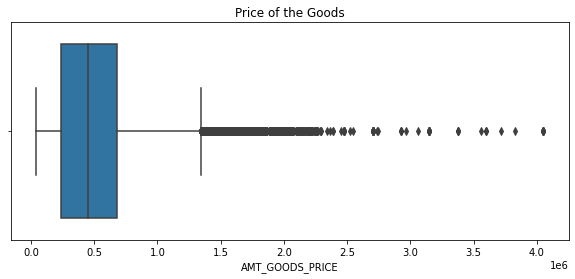

Mean   :  538316.5669311567
Median :  450000.0


In [113]:
plt.figure(figsize=[10,4])
sns.boxplot(app_data.AMT_GOODS_PRICE)
plt.title('Price of the Goods')
plt.show()
print('Mean   : ',app_data.AMT_GOODS_PRICE.mean())
print('Median : ',app_data.AMT_GOODS_PRICE.median())

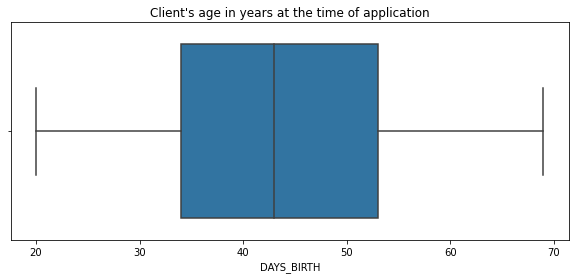

Mean   :  43.435998829306364
Median :  43.0


In [119]:
# This plot don't have outliers means, all the values lie within quartile range of plot and also the mean and median will have almost same value.
plt.figure(figsize=[10,4])
sns.boxplot(app_data.DAYS_BIRTH)
plt.title("Client's age in years at the time of application")
plt.show()
print('Mean   : ',app_data.DAYS_BIRTH.mean())
print('Median : ',app_data.DAYS_BIRTH.median())

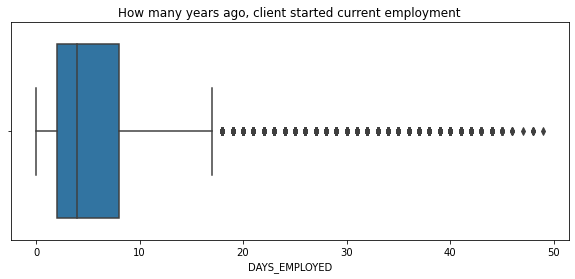

Mean   :  6.0370236697655235
Median :  4.0


In [115]:
plt.figure(figsize=[10,4])
sns.boxplot(app_data.DAYS_EMPLOYED[~(app_data.DAYS_EMPLOYED == 1000)])
plt.title('How many years ago, client started current employment')
plt.show()
print('Mean   : ',app_data.DAYS_EMPLOYED[~(app_data.DAYS_EMPLOYED == 1000)].mean())
print('Median : ',app_data.DAYS_EMPLOYED[~(app_data.DAYS_EMPLOYED == 1000)].median())

In [118]:
app_data[(app_data.DAYS_EMPLOYED == 1000)]

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED
8,100011,0,Y,112500.000,913500.0,Not Mentioned,Pensioner,Married,House / apartment,55,1000
11,100015,0,Y,38419.155,135000.0,Not Mentioned,Pensioner,Married,House / apartment,55,1000
23,100027,0,Y,83250.000,225000.0,Not Mentioned,Pensioner,Married,House / apartment,68,1000
38,100045,0,Y,99000.000,225000.0,Not Mentioned,Pensioner,Married,House / apartment,65,1000
43,100050,0,Y,108000.000,675000.0,Not Mentioned,Pensioner,Single / not married,House / apartment,64,1000
...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Y,202500.000,607500.0,Not Mentioned,Pensioner,Single / not married,House / apartment,61,1000
307483,456227,0,Y,99000.000,225000.0,Not Mentioned,Pensioner,Separated,House / apartment,68,1000
307487,456231,0,Y,117000.000,936000.0,Not Mentioned,Pensioner,Married,House / apartment,63,1000
307505,456249,0,Y,112500.000,225000.0,Not Mentioned,Pensioner,Single / not married,House / apartment,66,1000


#### Previous Data Outliers

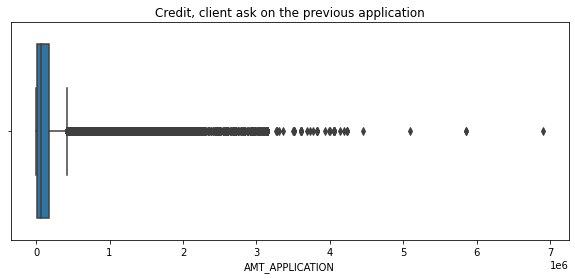

Mean   :  175233.86036042805
Median :  71046.0


In [126]:
plt.figure(figsize=[10,4])
sns.boxplot(prev_data.AMT_APPLICATION)
plt.title("Credit, client ask on the previous application")
plt.show()
print('Mean   : ',prev_data.AMT_APPLICATION.mean())
print('Median : ',prev_data.AMT_APPLICATION.median())

In [127]:
# Amount Applied previously, which are Outliers
prev_data[prev_data.AMT_APPLICATION > 5*10**6]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
779304,1119951,412009,Consumer loans,6905160.0,Refused,HC
1058067,1227516,346243,Consumer loans,5850000.0,Approved,XAP
1163698,1942241,346243,Consumer loans,5850000.0,Approved,XAP
1348406,1305961,324681,Consumer loans,5085000.0,Approved,XAP


### Merging both the datasets

By merging both the datasets, it would become easy to determine approval or acceptance based on previous and current data.

In [128]:
combined_data = pd.merge(app_data,prev_data,on='SK_ID_CURR')
combined_data

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_APPLICATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON
0,100002,1,Y,202500.0,351000.0,Laborers,Working,Single / not married,House / apartment,25,1,1038818,Consumer loans,179055.0,Approved,XAP
1,100003,0,N,270000.0,1129500.0,Core staff,State servant,Married,House / apartment,45,3,1810518,Cash loans,900000.0,Approved,XAP
2,100003,0,N,270000.0,1129500.0,Core staff,State servant,Married,House / apartment,45,3,2636178,Consumer loans,337500.0,Approved,XAP
3,100003,0,N,270000.0,1129500.0,Core staff,State servant,Married,House / apartment,45,3,2396755,Consumer loans,68809.5,Approved,XAP
4,100004,0,Y,67500.0,135000.0,Laborers,Working,Single / not married,House / apartment,52,0,1564014,Consumer loans,24282.0,Approved,XAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413693,456255,0,N,157500.0,675000.0,Laborers,Commercial associate,Married,House / apartment,46,3,2073384,Cash loans,229500.0,Approved,XAP
1413694,456255,0,N,157500.0,675000.0,Laborers,Commercial associate,Married,House / apartment,46,3,1708056,Revolving loans,45000.0,Refused,HC
1413695,456255,0,N,157500.0,675000.0,Laborers,Commercial associate,Married,House / apartment,46,3,1296007,Cash loans,765000.0,Refused,HC
1413696,456255,0,N,157500.0,675000.0,Laborers,Commercial associate,Married,House / apartment,46,3,2631384,Cash loans,1170000.0,Approved,XAP


In [130]:
# info() function is used to print a concise summary of a DataFrame
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413698 entries, 0 to 1413697
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1413698 non-null  int64  
 1   TARGET                1413698 non-null  int64  
 2   FLAG_OWN_REALTY       1413698 non-null  object 
 3   AMT_INCOME_TOTAL      1413698 non-null  float64
 4   AMT_GOODS_PRICE       1413698 non-null  float64
 5   OCCUPATION_TYPE       1413698 non-null  object 
 6   NAME_INCOME_TYPE      1413698 non-null  object 
 7   NAME_FAMILY_STATUS    1413698 non-null  object 
 8   NAME_HOUSING_TYPE     1413698 non-null  object 
 9   DAYS_BIRTH            1413698 non-null  int64  
 10  DAYS_EMPLOYED         1413698 non-null  int64  
 11  SK_ID_PREV            1413698 non-null  int64  
 12  NAME_CONTRACT_TYPE    1413698 non-null  object 
 13  AMT_APPLICATION       1413698 non-null  float64
 14  NAME_CONTRACT_STATUS  1413698 non-

In [131]:
# Here are statistical attributes of numerical columns in combined data.
combined_data.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,SK_ID_PREV,AMT_APPLICATION
count,1.413698e+06,1.413698e+06,1.413698e+06,1.413698e+06,1.413698e+06,1.413698e+06,1.413698e+06,1.413698e+06
mean,2.784816e+05,8.655102e-02,1.730681e+05,5.276523e+05,4.421386e+01,1.985504e+02,1.922745e+06,1.752438e+05
std,1.028116e+05,2.811761e-01,1.023134e+05,3.531032e+05,1.190217e+01,3.926381e+02,5.327152e+05,2.936225e+05
min,1.000020e+05,0.000000e+00,2.565000e+04,4.050000e+04,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00
25%,1.893640e+05,0.000000e+00,1.125000e+05,2.385000e+05,3.400000e+01,2.000000e+00,1.461347e+06,1.975050e+04
50%,2.789920e+05,0.000000e+00,1.575000e+05,4.500000e+05,4.300000e+01,6.000000e+00,1.922698e+06,7.087050e+04
75%,3.675560e+05,0.000000e+00,2.070000e+05,6.795000e+05,5.400000e+01,1.700000e+01,2.384013e+06,1.800000e+05
max,4.562550e+05,1.000000e+00,1.800009e+07,4.050000e+06,6.900000e+01,1.000000e+03,2.845381e+06,5.850000e+06


#### Dividing Combined data into two datasets based on target value whether client is defaulter or not.

In [132]:
# This is done to seperatly analyse defaulters and non-defaulters
target_0 = combined_data[combined_data.TARGET == 0]
target_1 = combined_data[combined_data.TARGET == 1]

#### TARGET variable imbalance

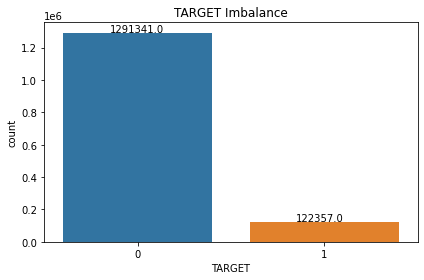

Percent of Others    :  91.34489827388876 %
Percent of Defaulters:  8.655101726111235 %


In [144]:
# This shows the count of defaulters and non-defaulters. 
fig = sns.countplot(combined_data.TARGET)
for d1 in fig.patches:
    fig.annotate('{:.1f}'.format(d1.get_height()), (d1.get_x()+0.25, d1.get_height()+3000))
plt.title('TARGET Imbalance')
plt.tight_layout()
plt.show()
print('Percent of Others    : ',(target_0.TARGET.count())*100/(target_0.TARGET.count()+target_1.TARGET.count()),'%')
print('Percent of Defaulters: ',(target_1.TARGET.count())*100/(target_0.TARGET.count()+target_1.TARGET.count()),'%')

The above countplot shows that the no. of defaulters are very less as compared to others. Defaulters are approx 8.6 %.

### Data Analysis using Plots

By using visual elements like charts, graphs, & maps we can have an accessible way to see and understand trends, outliers, and patterns in data.

The plot_distribution() function is created to easily visualize the **categorical variables**. Countplot is best suited for this.

In [147]:
def plot_distribution(field_name):
    
    plt.subplot(121)
    fig1 = sns.countplot(x=field_name,hue='TARGET',data=target_1,palette='Set1')
    plt.title('Client with Payment Difficulties')
    for d1 in fig1.patches:
        fig1.annotate('{:.1f}'.format(d1.get_height()), (d1.get_x()+0.1, d1.get_height()+300))
    
    plt.subplot(122)
    fig2 = sns.countplot(x=field_name,hue='TARGET',data=target_0)
    plt.title('Others')
    for d2 in fig2.patches:
        fig2.annotate('{:.1f}'.format(d2.get_height()), (d2.get_x()+0.1, d2.get_height()+3000))
    
    plt.tight_layout()
    plt.show()

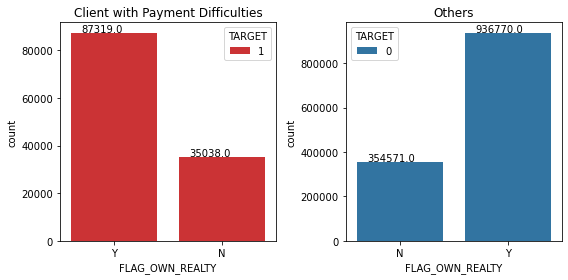

In [151]:
# Countplot showing the no. of clients having property 

plt.figure(figsize=[8,4])
plot_distribution('FLAG_OWN_REALTY')

1st plot shows, the defaulters with own property. There are 35038 clients who **don't own a property** and **are defaulters**. So the company should thing before their approval.

On the other hand, 2nd plot shows, non-defaulters with property.There are 936770 clients who **own a property** and are **not defaulters**. So the company should go for their approval.

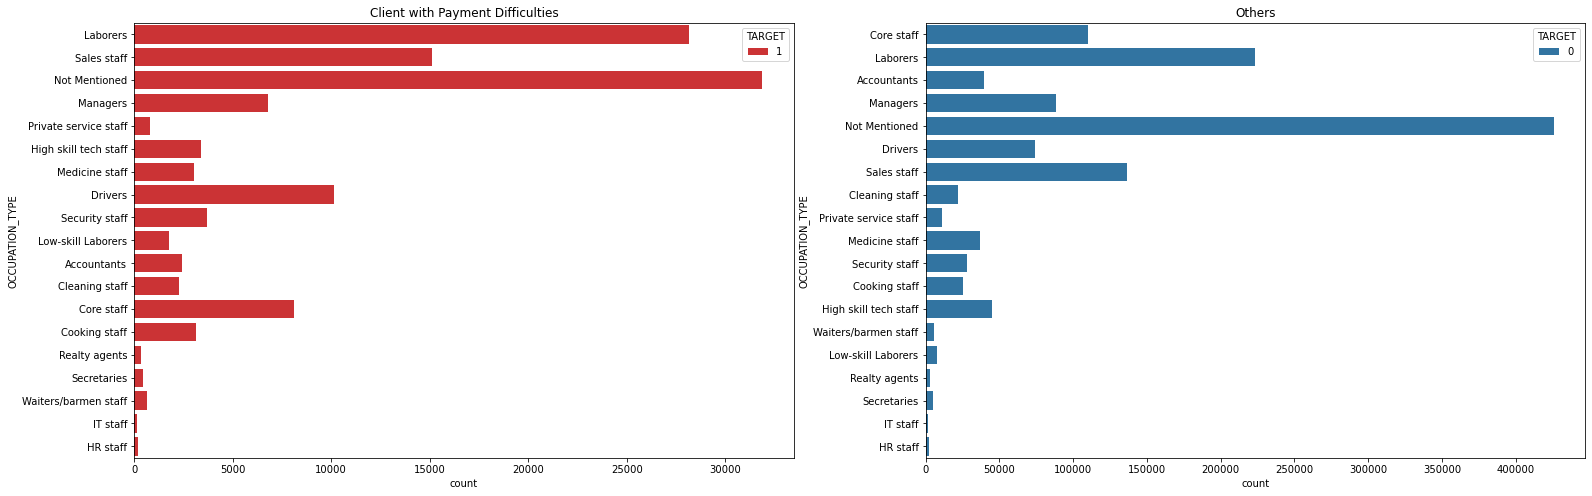

In [62]:
# 

plt.figure(figsize=[26,8])
plt.subplot(121)
fig1 = sns.countplot(y='OCCUPATION_TYPE',hue='TARGET',data=target_1,palette='Set1')
plt.title('Client with Payment Difficulties')

plt.subplot(122)
fig2 = sns.countplot(y='OCCUPATION_TYPE',hue='TARGET',data=target_0)
plt.title('Others')

plt.show()

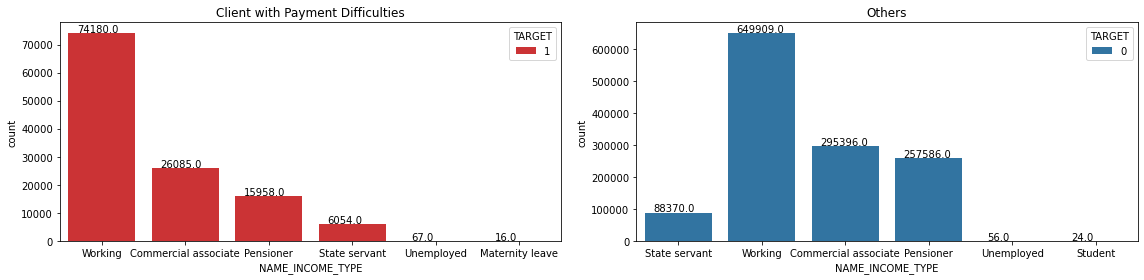

In [63]:
plt.figure(figsize=[16,4])
plot_distribution('NAME_INCOME_TYPE')

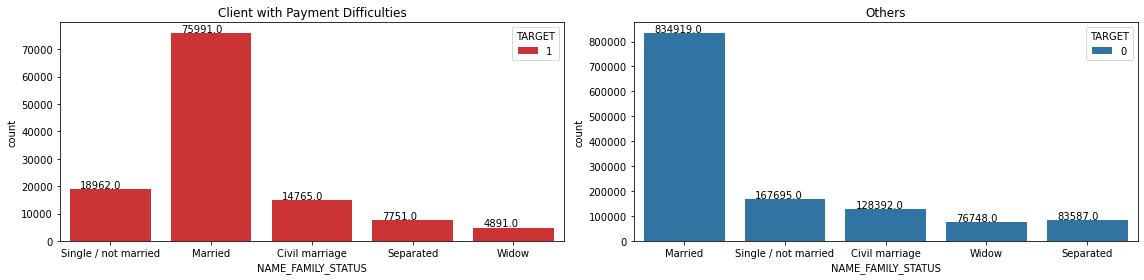

In [64]:
plt.figure(figsize=[16,4])
plot_distribution('NAME_FAMILY_STATUS')

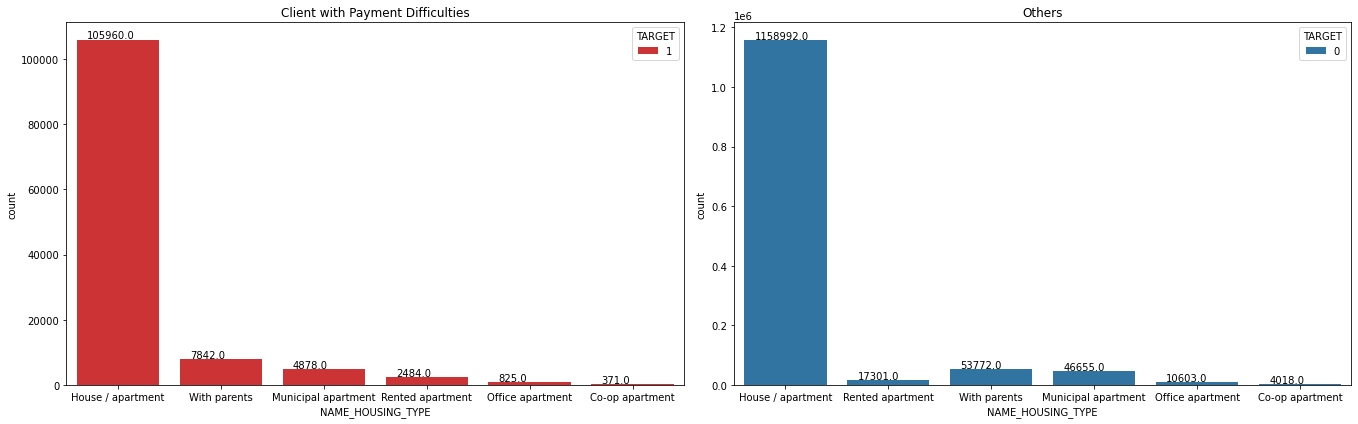

In [65]:
plt.figure(figsize=[19,6])
plot_distribution('NAME_HOUSING_TYPE')

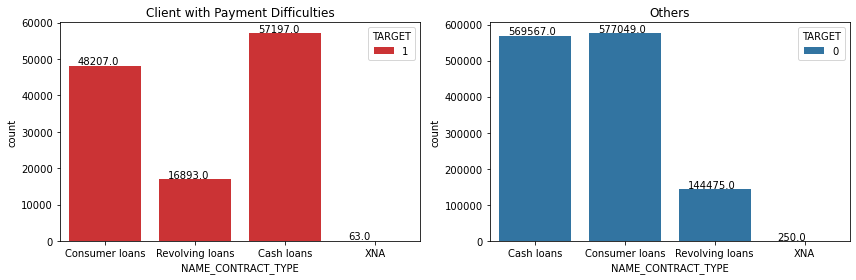

In [66]:
plt.figure(figsize=[12,4])
plot_distribution('NAME_CONTRACT_TYPE')

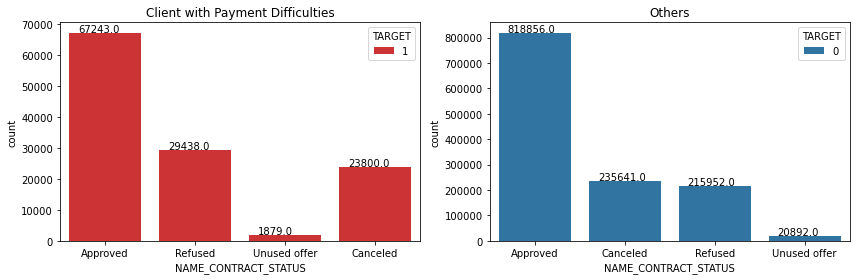

In [67]:
plt.figure(figsize=[12,4])
plot_distribution('NAME_CONTRACT_STATUS')

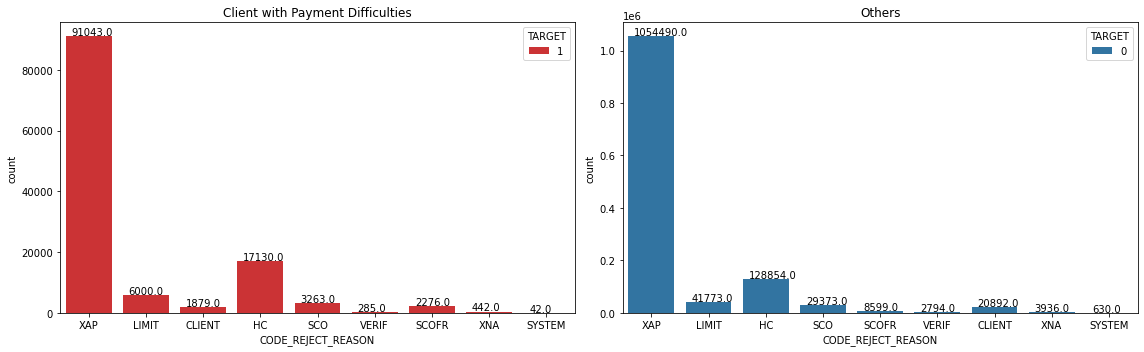

In [68]:
plt.figure(figsize=[16,5])
plot_distribution('CODE_REJECT_REASON')

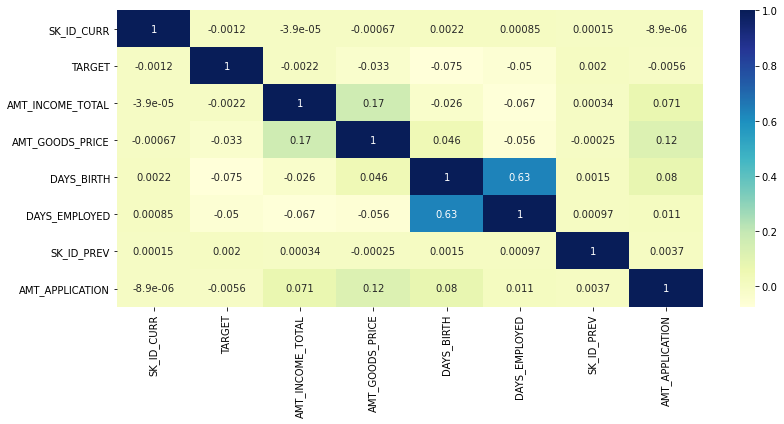

In [73]:
plt.figure(figsize=[12,6])
sns.heatmap(combined_data.corr(),annot=True,cmap="YlGnBu")
plt.tight_layout()
plt.show()

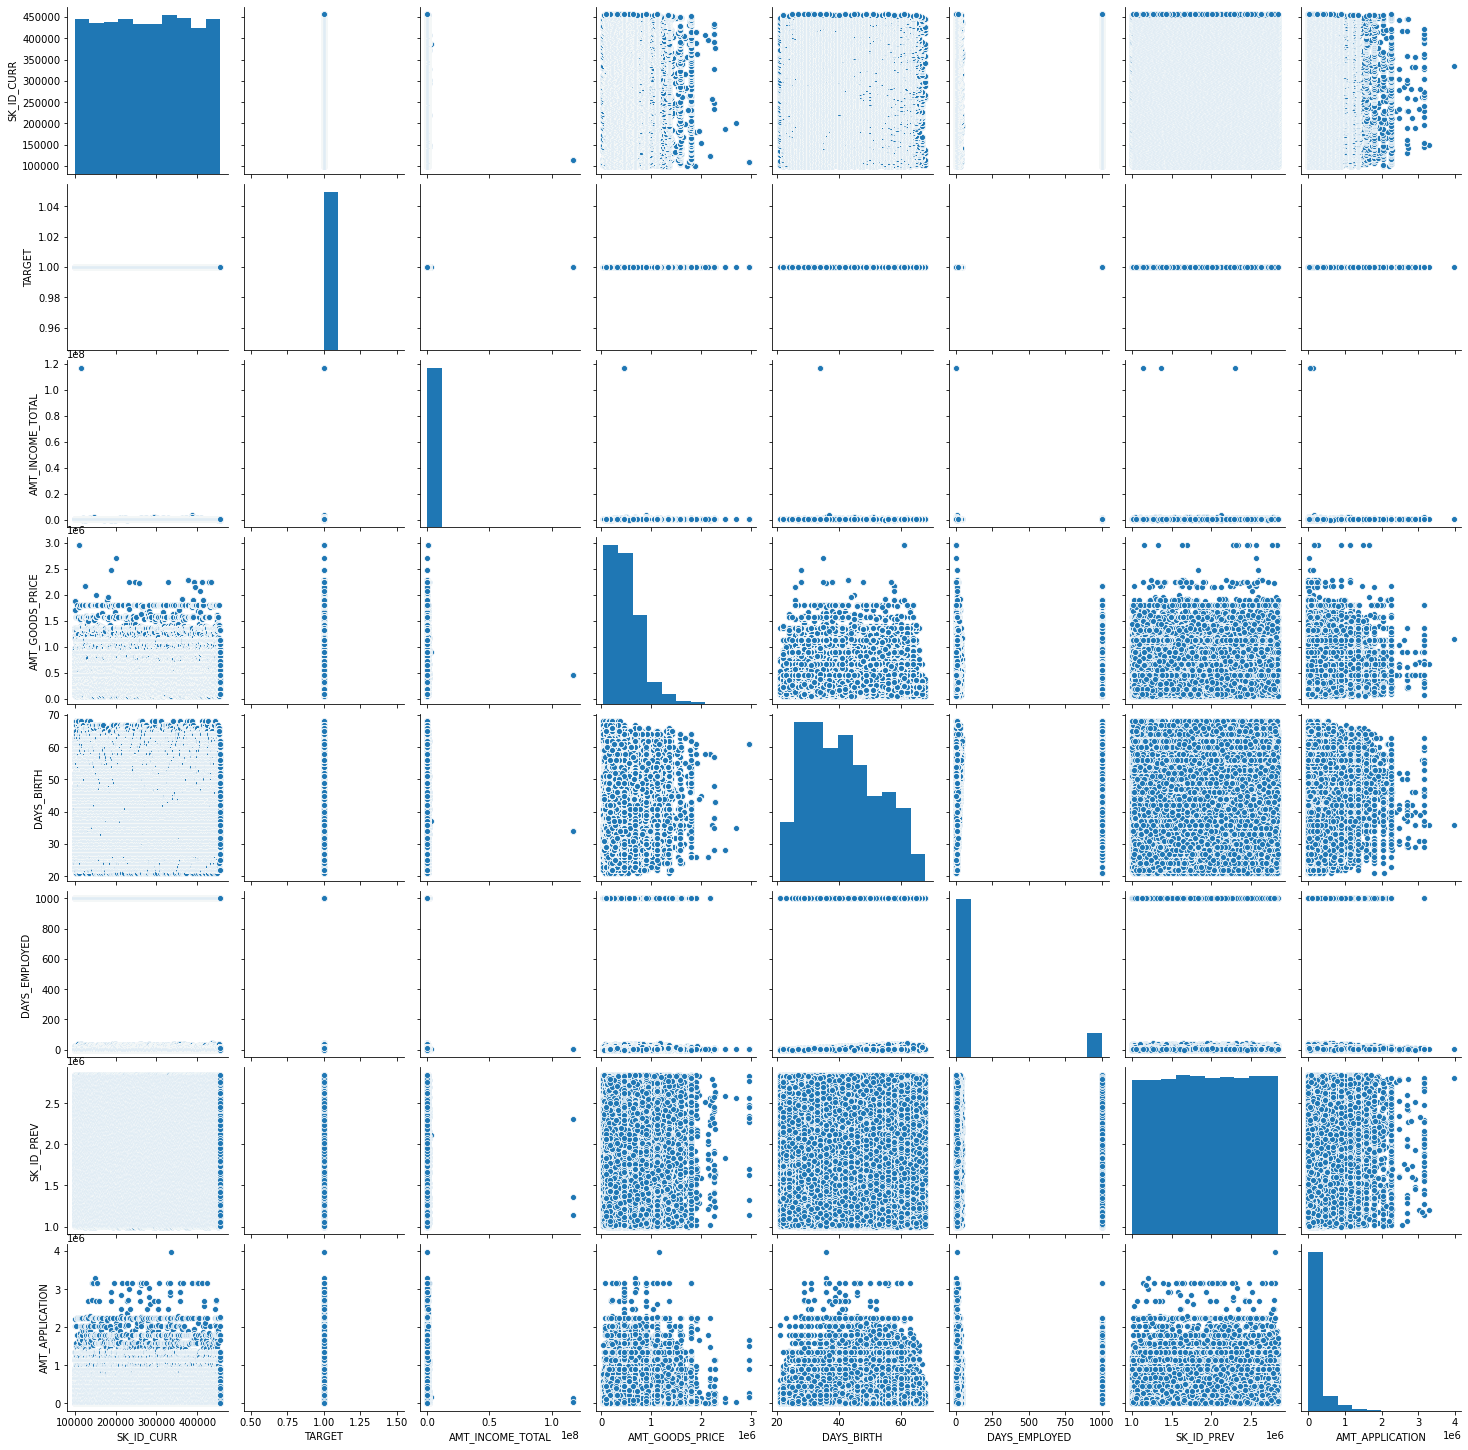

In [79]:
sns.pairplot(data=target_1,palette='Set1')
plt.show()

In [ ]:
sns.pairplot(data=target_0)
plt.show()